In [1]:
# Carga de librerias
import pandas as pd   ## principal módulo para la manipulación y análisis de datos (DataFrames)
import numpy as np   ## módulo de manipulación de matrices y vectores, cálculos numericos
import matplotlib.pyplot as plt ## principal módulo para gráficas
import seaborn as sns   ## otro módulo de gráficas

import plotly.express as px
import plotly.graph_objects as go


# Carga de Datos de Medidor de calidad de Energia ION8650 en CT FRJ1N

In [2]:
# Carga de Datos de Medidor de calidad de Energia ION8650 en CT FRJ1N
frj1n = pd.read_excel(r"C:\WinPython\WPy64-39100\notebooks\docs\ION_FRJ_.xlsx")

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
frj1n.columns = ['date','vll_ab','vll_bc', 'vll_ca', 'vll_avg', 'v_unbal', 'i_a', 'i_b', 'i_c', 'i_avg','kw_tot', 'kvar_tot', 'kva_tot', 'freq','Switch']

In [8]:
# Dimensiones del set de datos FRJ
filycol2 = frj1n.shape
filycol2

(36558, 15)

In [9]:
frj1n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36558 entries, 0 to 36557
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      36558 non-null  datetime64[ns]
 1   vll_ab    36558 non-null  float64       
 2   vll_bc    36558 non-null  float64       
 3   vll_ca    36558 non-null  float64       
 4   vll_avg   36558 non-null  float64       
 5   v_unbal   36558 non-null  float64       
 6   i_a       36558 non-null  float64       
 7   i_b       36558 non-null  float64       
 8   i_c       36558 non-null  float64       
 9   i_avg     36558 non-null  float64       
 10  kw_tot    36558 non-null  float64       
 11  kvar_tot  36558 non-null  float64       
 12  kva_tot   36558 non-null  float64       
 13  freq      36558 non-null  object        
 14  Switch    36558 non-null  int64         
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 4.2+ MB


In [10]:
# Visualizacion de la informacion FRJ
frj1n.head(5)

,date,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,Switch
0,2023-05-02 20:45:00,13564.601,13676.08800,13625.21582,13621.96800,0.681128,28.492443,25.620981,25.445852,26.460642,615.075439,57.009579,617.649658,60.066013,0
1,2023-05-02 20:30:00,13503.564,13602.38000,13570.26700,13555.15625,0.626721,29.036205,25.575148,25.502625,26.653734,618.490417,59.718563,620.937866,60.043034,0
2,2023-05-02 20:15:00,13567.913,13658.65332,13634.95500,13620.50800,0.607101,28.467047,25.240606,25.277708,26.248981,610.750916,54.337734,612.865906,60.032059,0
3,2023-05-02 20:00:00,13533.777,13599.11600,13590.74600,13571.46100,0.536207,28.508415,25.224625,25.349134,26.335846,611.018494,57.305954,613.699890,60.045185,0
4,2023-05-02 19:45:00,13490.521,13590.71300,13566.94200,13549.31300,0.650523,28.793371,26.007170,25.830090,26.876274,623.831848,59.849789,626.488770,60.053532,0


In [11]:
# Estadistica descriptiva FRJ
frj1n.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,Switch
count,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000
mean,13462.928725,13555.783462,13503.875369,13507.461920,0.462848,29.912294,26.815128,26.457611,27.727463,641.444829,89.656266,648.968036,0.006866
std,692.170325,694.198364,690.917291,692.181875,0.484649,5.031593,4.622766,4.456494,4.702205,105.695637,50.573302,110.143768,0.082576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.470876,0.000000,0.000000
25%,13417.313178,13511.507500,13464.372552,13465.366000,0.350081,27.287130,24.281380,24.159137,25.244887,587.875351,41.407811,589.354462,0.000000
50%,13484.630500,13580.073500,13532.310250,13531.908000,0.409133,28.744053,25.589006,25.371133,26.541125,615.820649,60.554441,618.642730,0.000000
75%,13582.839750,13675.927000,13620.641000,13624.594750,0.483635,33.532539,30.298200,29.696886,31.178847,718.593155,141.343022,732.354233,0.000000
max,14856.306000,14897.074000,14854.118000,14869.164000,54.561596,37.106956,33.506409,32.925125,34.483212,769.496826,170.949509,787.571472,1.000000


In [12]:
# Proceso Generador de Datos

#En la acometida principal de los Centros Tecnicos se tiene instalado un medidor de calidad de energia, para el registro de la alimentacion de energia, voltaje en media tension, corriente y potencia consumida.  Asi como otra serie de variables mas especificas de calidad de energia.  Para este caso, se considera un medidor Schneider Electric modelo ION8650B el cual se encuentra instalado en la celda de media tension de CT Fraijanes.

# La extraccion de la informacion del medidor se realiza de forma manual utilizando el software ION Setup v3.1.  Los datos registrados se almacenan en un archivo de excel desde el 17-04-2022 a la 1:00:00 horas.  El dataset contiene mediciones de las variables de energia en periodos de 15 minutos, hasta la fecha promedio de las 3 lineas (sistema trifasico)

# Los datos son del tipo estructurados, y la lectura de cada registro es el promedio registrado en el periodo de 15 minutos de la frecuencia de la medicion.  El medidor de calidad de energia tiene la capacidad de obtener mediciones mas precisas y de otras variables, sin embargo, para nuestra area por el momento unicamente se registra la medicion de las variables de distribucion y no de QoE (quality of energy). 

#     Column         Non-Null Count  Dtype           Description
# ---  ------         --------------  -----          ----------------------------------------
# 0   Date/Time      36558 non-null  datetime64[ns]  Fecha y hora de la medicion  
# 1   Vll ab mean    36558 non-null  float64         Voltaje linea a linea entre fases a y b
# 2   Vll bc mean    36558 non-null  float64         Voltaje linea a linea entre fases b y c
# 3   Vll ca mean    36558 non-null  float64         Voltaje linea a linea entre fases c y a
# 4   Vll avg mean   36558 non-null  float64         Voltaje promedio de las 3 lineas 
# 5   V unbal mean   36558 non-null  float64         Voltaje de desbalance
# 6   I a mean       36558 non-null  float64         Corriente linea a
# 7   I b mean       36558 non-null  float64         Corriente linea b
# 8   I c mean       36558 non-null  float64         Corriente linea c
# 9   I avg mean     36558 non-null  float64         Corriente promedio de las 3 lineas
# 10  kW tot mean    36558 non-null  float64         Potencia Activa total
# 11  kVAR tot mean  36558 non-null  float64         Potencia Reactiva total
# 12  kVA tot mean   36558 non-null  float64         Potencia Aparente total
# 13  Freq mean      36558 non-null  float64         Frecuencia
# 14  SWITCH         36558 non-null  int             Conmutación de enegía comercial a planta de emergencia (variable respuesta)

In [13]:
frj1n["freq"] = pd.to_numeric(frj1n["freq"], errors = 'coerce')

In [14]:
frj1n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36558 entries, 0 to 36557
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      36558 non-null  datetime64[ns]
 1   vll_ab    36558 non-null  float64       
 2   vll_bc    36558 non-null  float64       
 3   vll_ca    36558 non-null  float64       
 4   vll_avg   36558 non-null  float64       
 5   v_unbal   36558 non-null  float64       
 6   i_a       36558 non-null  float64       
 7   i_b       36558 non-null  float64       
 8   i_c       36558 non-null  float64       
 9   i_avg     36558 non-null  float64       
 10  kw_tot    36558 non-null  float64       
 11  kvar_tot  36558 non-null  float64       
 12  kva_tot   36558 non-null  float64       
 13  freq      36464 non-null  float64       
 14  Switch    36558 non-null  int64         
dtypes: datetime64[ns](1), float64(13), int64(1)
memory usage: 4.2 MB


In [15]:
# Estadistica descriptiva FRJ
frj1n.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,Switch
count,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36558.000000,36464.000000,36558.000000
mean,13462.928725,13555.783462,13503.875369,13507.461920,0.462848,29.912294,26.815128,26.457611,27.727463,641.444829,89.656266,648.968036,60.003173,0.006866
std,692.170325,694.198364,690.917291,692.181875,0.484649,5.031593,4.622766,4.456494,4.702205,105.695637,50.573302,110.143768,0.015331,0.082576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.470876,0.000000,59.151707,0.000000
25%,13417.313178,13511.507500,13464.372552,13465.366000,0.350081,27.287130,24.281380,24.159137,25.244887,587.875351,41.407811,589.354462,59.997280,0.000000
50%,13484.630500,13580.073500,13532.310250,13531.908000,0.409133,28.744053,25.589006,25.371133,26.541125,615.820649,60.554441,618.642730,60.001125,0.000000
75%,13582.839750,13675.927000,13620.641000,13624.594750,0.483635,33.532539,30.298200,29.696886,31.178847,718.593155,141.343022,732.354233,60.005589,0.000000
max,14856.306000,14897.074000,14854.118000,14869.164000,54.561596,37.106956,33.506409,32.925125,34.483212,769.496826,170.949509,787.571472,61.156010,1.000000


Graficos de Dispersion

<AxesSubplot:xlabel='date', ylabel='vll_ca'>

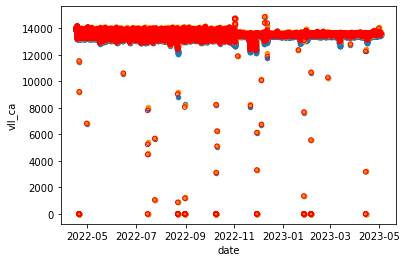

In [16]:
#vll de cada una de las fases en Media Tension
fig, ax = plt.subplots()
frj1n.plot.scatter('date','vll_ab', ax=ax)
frj1n.plot.scatter('date','vll_bc', c='darkorange', ax=ax)
frj1n.plot.scatter('date','vll_ca', c='none', edgecolor='red', ax=ax)

<AxesSubplot:xlabel='date', ylabel='vll_avg'>

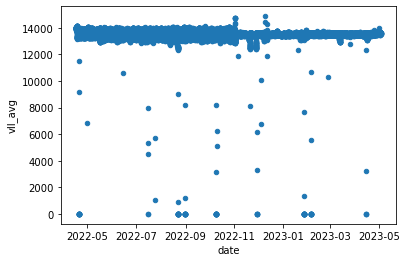

In [17]:
#voltaje linea a linea promedio de las 3 fases
fig, ax = plt.subplots()
frj1n.plot.scatter('date','vll_avg', ax=ax)

<AxesSubplot:xlabel='date', ylabel='i_c'>

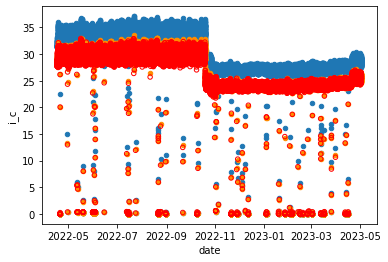

In [23]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','i_a', ax=ax)
frj1n.plot.scatter('date','i_b', c='darkorange', ax=ax)
frj1n.plot.scatter('date','i_c', c='none', edgecolor='red', ax=ax)

#se observa un leve desbalance en la carga para la Fase A

<AxesSubplot:xlabel='date', ylabel='i_avg'>

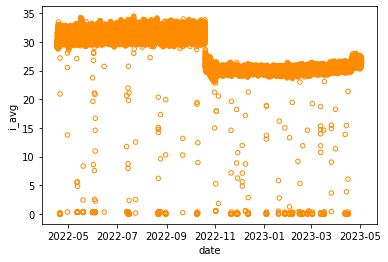

In [26]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','i_avg',c='none', edgecolor='darkorange', ax=ax)

In [18]:
#Variables predictoras que consideramos tienen mayor incidencia en la variable respuesta
#vll_avg
#i_avg
#freq
#kw_tot

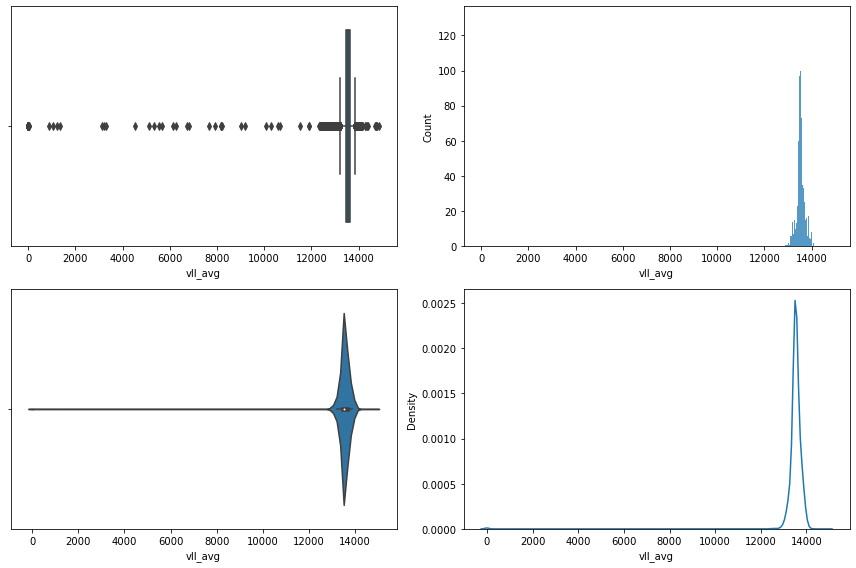

In [19]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n, x='vll_avg', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n,x='vll_avg', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n,x='vll_avg', ax=axs[1,0])
sns.kdeplot(data=frj1n, x='vll_avg', ax=axs[1,1])
plt.tight_layout()

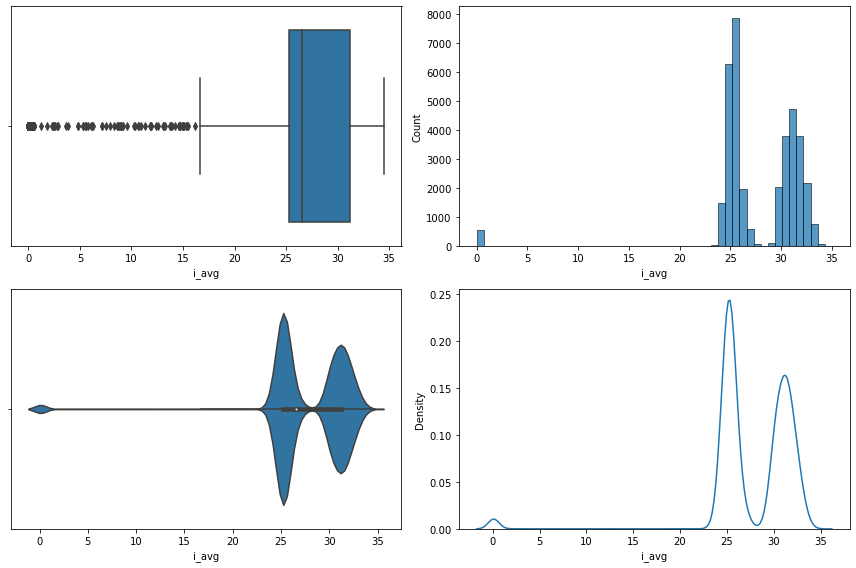

In [20]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n, x='i_avg', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n,x='i_avg', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n,x='i_avg', ax=axs[1,0])
sns.kdeplot(data=frj1n, x='i_avg', ax=axs[1,1])
plt.tight_layout()

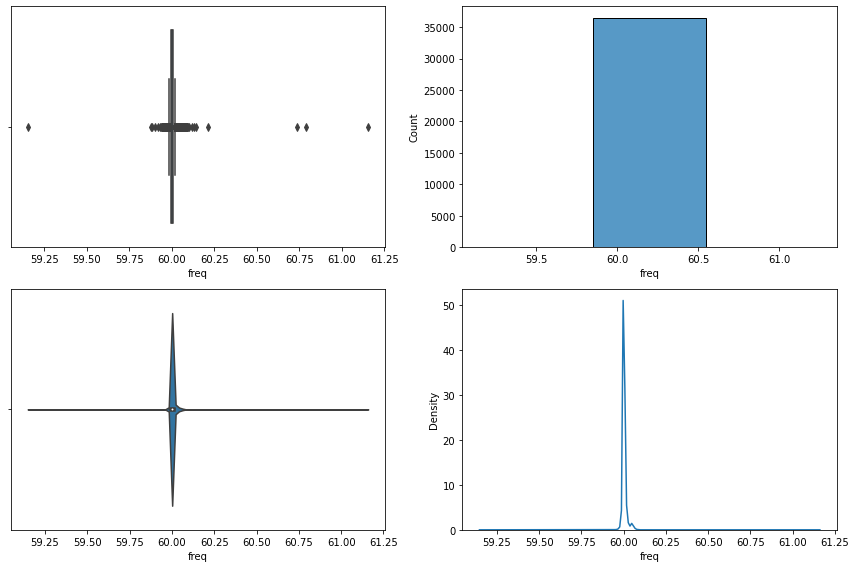

In [21]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n, x='freq', orient='h', ax=axs[0,0])
sns.histplot(data=frj1n,x='freq', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n,x='freq', ax=axs[1,0])
sns.kdeplot(data=frj1n, x='freq', ax=axs[1,1])
plt.tight_layout()

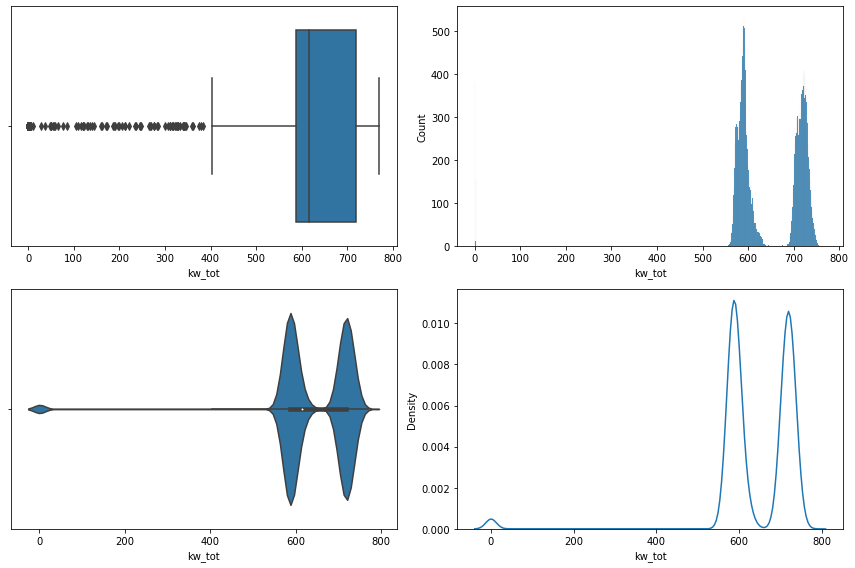

In [22]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=frj1n, x='kw_tot', orient='h', ax=axs[0,0]) #los outliers refieren a cortes de energia
sns.histplot(data=frj1n,x='kw_tot', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=frj1n,x='kw_tot', ax=axs[1,0])
sns.kdeplot(data=frj1n, x='kw_tot', ax=axs[1,1])
plt.tight_layout()

<AxesSubplot:xlabel='date', ylabel='v_unbal'>

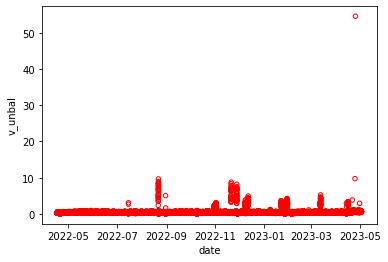

In [24]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','v_unbal',c='none', edgecolor='red', ax=ax)

<AxesSubplot:ylabel='Density'>

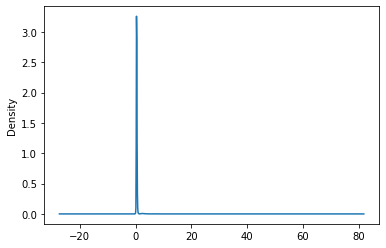

In [25]:
frj1n['v_unbal'].plot.kde()

In [27]:
#graficos del triangulo de potencias (kW, kVA, kVAR)

<AxesSubplot:xlabel='date', ylabel='kw_tot'>

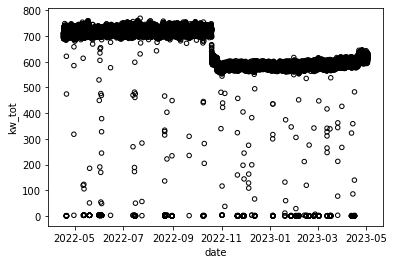

In [28]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','kw_tot',c='none', edgecolor='black', ax=ax)

<AxesSubplot:xlabel='date', ylabel='kvar_tot'>

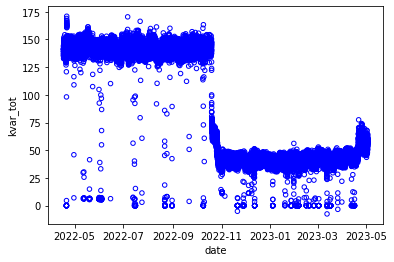

In [29]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','kvar_tot',c='none', edgecolor='blue', ax=ax)

<AxesSubplot:xlabel='date', ylabel='kva_tot'>

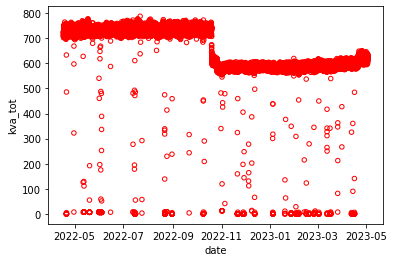

In [30]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','kva_tot',c='none', edgecolor='red', ax=ax)

<AxesSubplot:xlabel='date', ylabel='freq'>

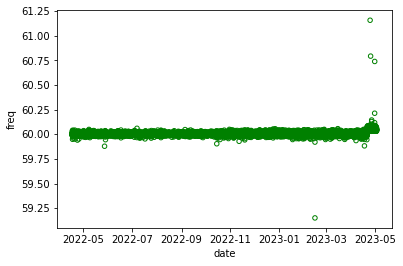

In [31]:
fig, ax = plt.subplots()
frj1n.plot.scatter('date','freq',c='none', edgecolor='green', ax=ax)

In [33]:
#para elaborar el siguiente grafico se eliminaron las 2 variables que no son numericas
df = pd.DataFrame(data=frj1n)
del df['date']
del df['Switch']

In [34]:
df

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq
0,13564.601,13676.08800,13625.21582,13621.96800,0.681128,28.492443,25.620981,25.445852,26.460642,615.075439,57.009579,617.649658,60.066013
1,13503.564,13602.38000,13570.26700,13555.15625,0.626721,29.036205,25.575148,25.502625,26.653734,618.490417,59.718563,620.937866,60.043034
2,13567.913,13658.65332,13634.95500,13620.50800,0.607101,28.467047,25.240606,25.277708,26.248981,610.750916,54.337734,612.865906,60.032059
3,13533.777,13599.11600,13590.74600,13571.46100,0.536207,28.508415,25.224625,25.349134,26.335846,611.018494,57.305954,613.699890,60.045185
4,13490.521,13590.71300,13566.94200,13549.31300,0.650523,28.793371,26.007170,25.830090,26.876274,623.831848,59.849789,626.488770,60.053532
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36553,13794.535,13866.51300,13842.20000,13834.40800,0.243253,32.482582,29.274456,28.863388,30.206839,708.708008,139.237228,722.371399,60.001320
36554,13868.192,13957.82900,13915.89800,13913.97100,0.265036,32.559765,29.345390,28.857056,30.254066,713.095947,144.368851,727.587830,59.993851
36555,13858.353,13957.39700,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,711.119751,141.916824,725.203430,59.997093
36556,13815.879,13915.19500,13881.89600,13870.99400,0.348926,32.330872,29.136560,28.907778,30.125074,708.361816,140.894333,722.348267,60.006119


In [35]:
frj1n

,date,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,Switch
0,2023-05-02 20:45:00,13564.601,13676.08800,13625.21582,13621.96800,0.681128,28.492443,25.620981,25.445852,26.460642,615.075439,57.009579,617.649658,60.066013,0
1,2023-05-02 20:30:00,13503.564,13602.38000,13570.26700,13555.15625,0.626721,29.036205,25.575148,25.502625,26.653734,618.490417,59.718563,620.937866,60.043034,0
2,2023-05-02 20:15:00,13567.913,13658.65332,13634.95500,13620.50800,0.607101,28.467047,25.240606,25.277708,26.248981,610.750916,54.337734,612.865906,60.032059,0
3,2023-05-02 20:00:00,13533.777,13599.11600,13590.74600,13571.46100,0.536207,28.508415,25.224625,25.349134,26.335846,611.018494,57.305954,613.699890,60.045185,0
4,2023-05-02 19:45:00,13490.521,13590.71300,13566.94200,13549.31300,0.650523,28.793371,26.007170,25.830090,26.876274,623.831848,59.849789,626.488770,60.053532,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36553,2022-04-17 02:00:00,13794.535,13866.51300,13842.20000,13834.40800,0.243253,32.482582,29.274456,28.863388,30.206839,708.708008,139.237228,722.371399,60.001320,0
36554,2022-04-17 01:45:00,13868.192,13957.82900,13915.89800,13913.97100,0.265036,32.559765,29.345390,28.857056,30.254066,713.095947,144.368851,727.587830,59.993851,0
36555,2022-04-17 01:30:00,13858.353,13957.39700,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,711.119751,141.916824,725.203430,59.997093,0
36556,2022-04-17 01:15:00,13815.879,13915.19500,13881.89600,13870.99400,0.348926,32.330872,29.136560,28.907778,30.125074,708.361816,140.894333,722.348267,60.006119,0


array([<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
       <AxesSubplot:ylabel='Density'>], dtype=object)

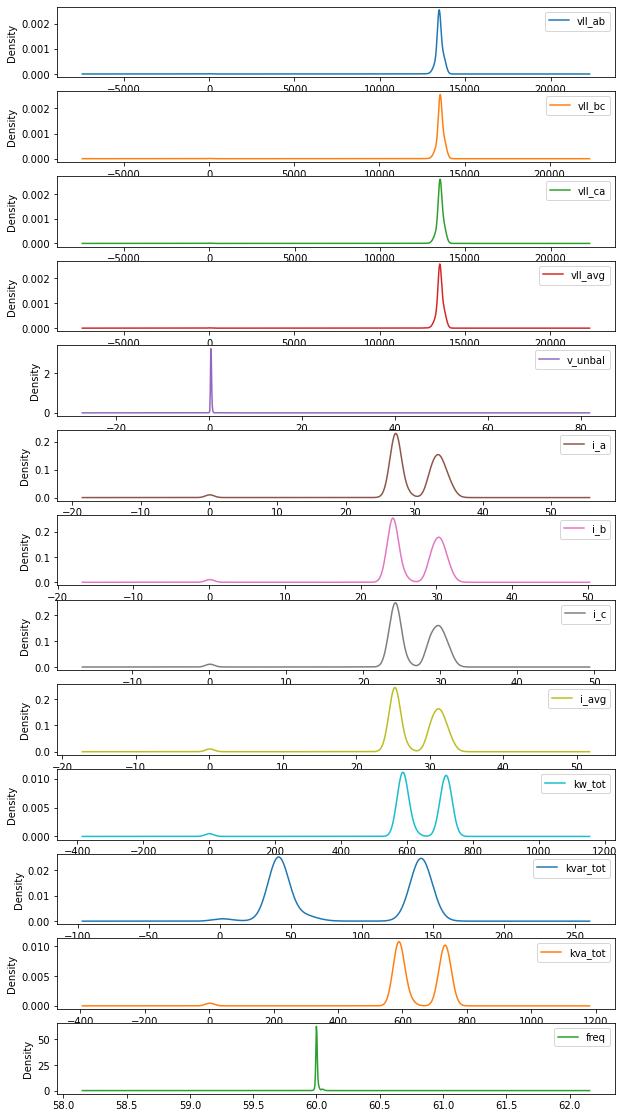

In [36]:
df.plot.kde(subplots=True, figsize=(10,20), sharex=False)

# Los Aires Acondicionados representan un aporte significativo en la demanda de potencia reactiva 
# ya que fueron los que se sacaron hacia el plan de contingencia

In [38]:
#Relaciones entre variables

<AxesSubplot:xlabel='vll_avg', ylabel='i_avg'>

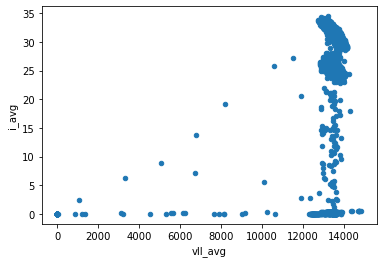

In [39]:
#voltaje linea-linea promedio vs corriente promedio 
fig, ax = plt.subplots()
frj1n.plot.scatter('vll_avg','i_avg', ax=ax)

<AxesSubplot:xlabel='kw_tot', ylabel='i_avg'>

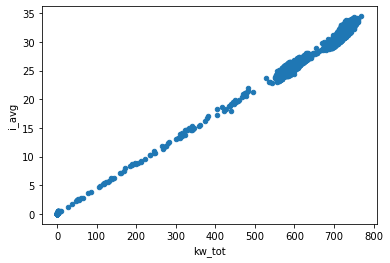

In [40]:
#potencia activa promedio vs corriente promedio - correlacionado
fig, ax = plt.subplots()
frj1n.plot.scatter('kw_tot','i_avg', ax=ax)

<AxesSubplot:xlabel='kw_tot', ylabel='vll_avg'>

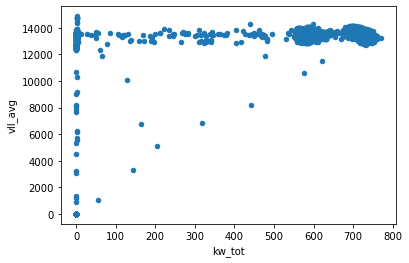

In [41]:
#potencia activa promedio vs voltaje linea-linea promedio
fig, ax = plt.subplots()
frj1n.plot.scatter('kw_tot','vll_avg', ax=ax)

<AxesSubplot:xlabel='Switch', ylabel='count'>

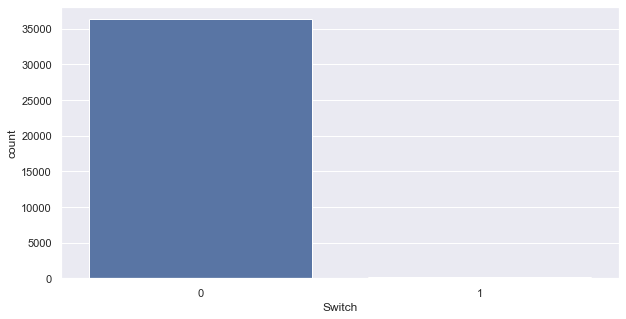

In [43]:
#grafico de barras de la variable respuesta
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n,x='Switch')

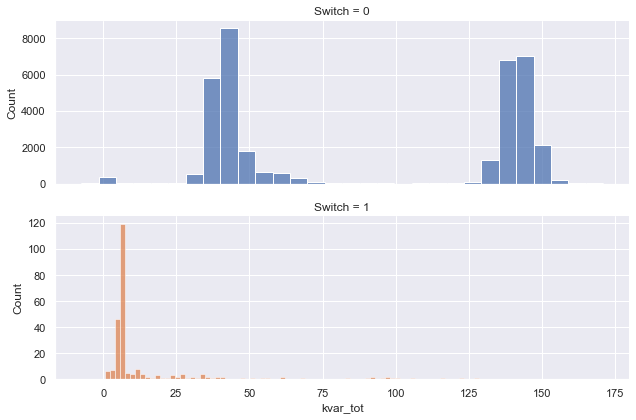

In [45]:
g = sns.FacetGrid(frj1n, sharey=False, row='Switch',  hue='Switch',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='kvar_tot')#, log_scale=True, binwidth=0.03)

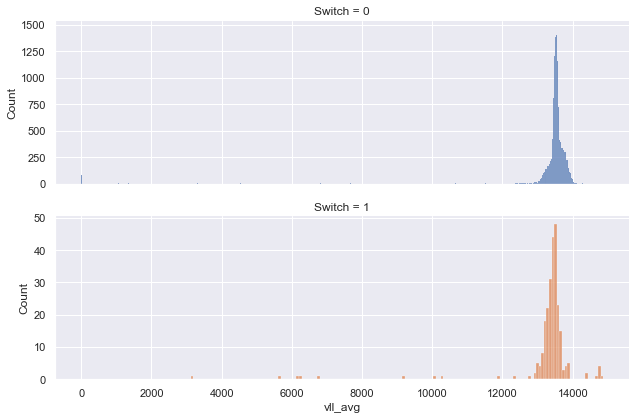

In [47]:
g = sns.FacetGrid(frj1n, sharey=False, row='Switch',  hue='Switch',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='vll_avg')#, log_scale=True, binwidth=0.03)

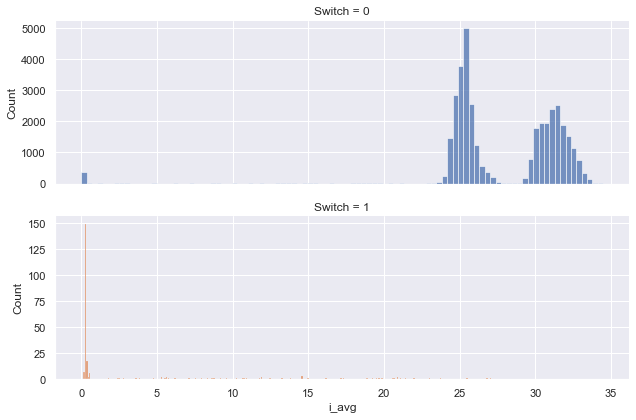

In [48]:

g = sns.FacetGrid(frj1n, sharey=False, row='Switch',  hue='Switch',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='i_avg')#, log_scale=True, binwidth=0.03)

Analisis Actual del Set de Datos - unicamente se observa tendencia de comportamiento de la Potencia Activa

In [49]:
#Datos agrupados por dia; se toma el valor maximo de cada día para discriminar los cortes de energia durante periodos cortos
#Esto no genera una visualizacion del comportamiento de la potencia en el tiempo.
frj = frj1n.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).max()

<AxesSubplot:xlabel='date'>

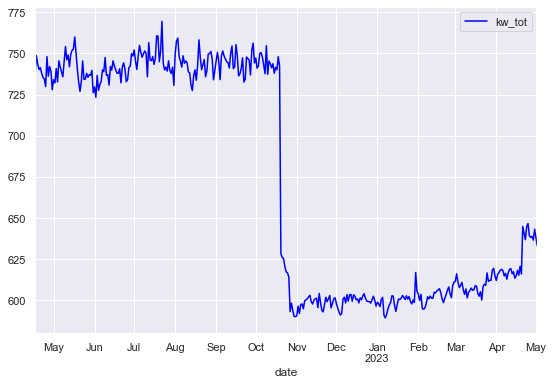

In [50]:
#Grafico de lineas
frj.plot.line(y="kw_tot",
                color = "blue",
                figsize =(9,6))

In [51]:
# variable 'kw_tot' por hora
hora = frj1n.groupby(pd.Grouper(key='date', axis=0, 
                      freq='D')).median()

<AxesSubplot:xlabel='kw_tot', ylabel='Count'>

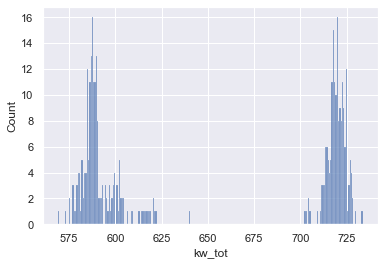

In [52]:
#Grafico Histograma
sns.histplot(data=hora,x='kw_tot', binwidth=0.7)

# Distribucion Bimodal, lo que se explica por la disminucion de la carga por la implementacion de la contingencia en la 
# subestacion.

In [53]:
import datetime

In [54]:
fecha = datetime
print(fecha)

<module 'datetime' from 'C:\\WinPython\\WPy64-39100\\python-3.9.10.amd64\\lib\\datetime.py'>


Creacion de nuevas Features

In [55]:
vnominal = 13600 # voltaje nominal de la red electrica de la EEGSA para el suministro de energia en media tension

frj1n['vclasif_ab'] = frj1n.vll_ab.map(lambda x : 'Voltaje Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))
frj1n['vclasif_bc'] = frj1n.vll_bc.map(lambda x : 'Voltaje Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))
frj1n['vclasif_ca'] = frj1n.vll_ca.map(lambda x : 'Voltaje Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))

#frj1n['vclasif_avg'] = frj1n.vll_avg.map(lambda x : 'Voltaj Normal' if (x > 0.95 * vnominal  and x < 1.05*vnominal) else ( "Bajo Voltaje" if (x <= 0.95 * vnominal) else "Alto Voltaje" ))

In [56]:
frj1n['vclasif_ab'].value_counts()

Voltaje Normal    36213
Bajo Voltaje        337
Alto Voltaje          8
Name: vclasif_ab, dtype: int64

In [57]:
frj1n['vclasif_bc'].value_counts()

Voltaje Normal    36362
Bajo Voltaje        187
Alto Voltaje          9
Name: vclasif_bc, dtype: int64

In [58]:
frj1n['vclasif_ca'].value_counts()

Voltaje Normal    36333
Bajo Voltaje        215
Alto Voltaje         10
Name: vclasif_ca, dtype: int64

In [ ]:
#frj1n['vclasif_avg'].value_counts()

In [59]:
sns.set_theme(style="darkgrid")

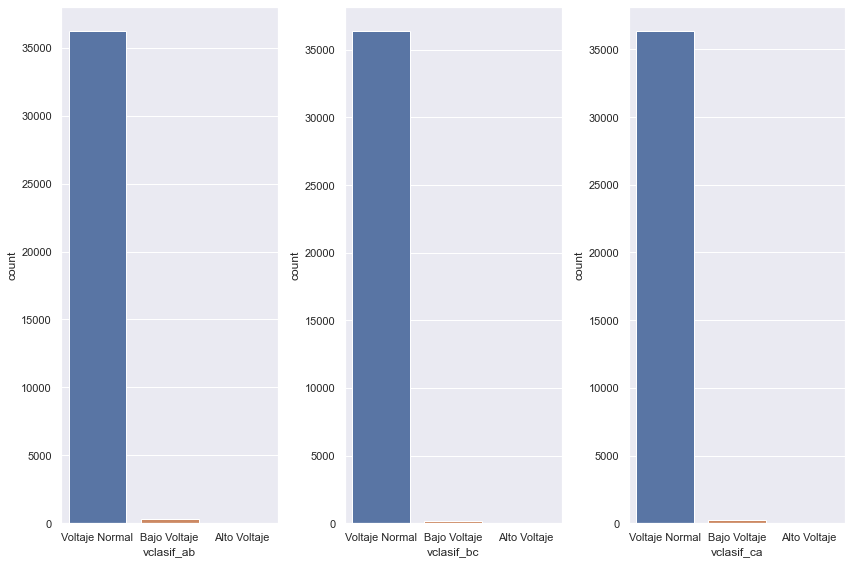

In [60]:
fig, axs = plt.subplots(1,3, figsize=(12,8)) #create grid
sns.countplot(data=frj1n,x='vclasif_ab', ax=axs[0])
sns.countplot(data=frj1n,x='vclasif_bc', ax=axs[1])
sns.countplot(data=frj1n,x='vclasif_ca', ax=axs[2])
plt.tight_layout()

In [62]:
#creacion de nueva feature indicando para visualizar warning por potencia reactiva de 150 kVAR
frj1n['kvar_warn']=frj1n.kvar_tot.map(lambda x: 'Warning' if x>150 else 'Ok')

In [63]:
frj1n['kvar_warn'].value_counts()

Ok         35808
Warning      750
Name: kvar_warn, dtype: int64

<AxesSubplot:xlabel='kvar_warn', ylabel='count'>

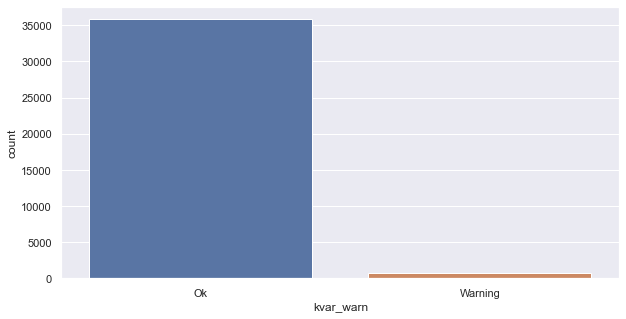

In [64]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n,x='kvar_warn')

In [65]:
# De acuerdo al REGLAMENTO DEL MERCADO ELÉCTRICO REGIONAL -RMER- en los citerios de operacion del SISTEMA ELECTRICO 
# REGIONAL - SER- en el inciso 16.2.5 Criterios y Parámetros de Calidad indica para la frecuencia de la red:
# 16.2.5   Criterios y Parámetros de Calidad
# 16.2.5.5 La frecuencia nominal del SER es 60 Hz.
# 16.2.5.6 Durante la operación normal, el 90% de las variaciones de la frecuencia promedio en
#          períodos de 10 minutos, deberán estar comprendidas dentro del rango de (60 ± 1.65 σ) Hz,
#          donde σ es la desviación estándar de la frecuencia promedio en períodos de 10 minutos. El
#          valor de σ será de 0.03 Hz.

# creacion de nueva feature indicando riesgo de operacion por frecuencia fuera de 
# parametros de operacion: 60hz+/- 1.65 * (0.03) hz. sigma = 0.03 hz   [59.5, 60.5]

frj1n["freq"] = pd.to_numeric(frj1n["freq"], errors = 'coerce')

frj1n['freq_error']=frj1n.freq.map(lambda x: 'QoE_Ok' if 60.05>x>59.95 else 'QoE_Out')

In [66]:
frj1n['freq_error'].value_counts()

QoE_Ok     35866
QoE_Out      692
Name: freq_error, dtype: int64

<AxesSubplot:xlabel='freq_error', ylabel='count'>

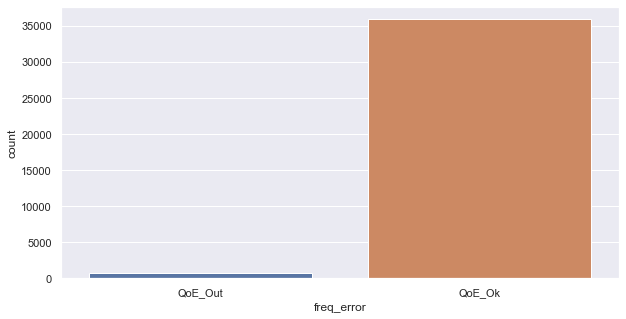

In [67]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(data=frj1n,x='freq_error')

Limpieza de Outliers y Transformaciones

In [69]:
#limpieza de outliers en mediciones de voltaje y corriente, los cuales se generan por cortes de energia electrica

frj1n['vll_avg'].quantile([0.1,0.5,0.9,0.95,0.99])

0.10    13331.86100
0.50    13531.90800
0.90    13781.56690
0.95    13851.14235
0.99    13963.88320
Name: vll_avg, dtype: float64

In [70]:
frj1n_10 = frj1n[frj1n['vll_avg']>frj1n['vll_avg'].quantile(0.1)].copy()

In [71]:
frj1n_99 = frj1n_10[frj1n_10['vll_avg']<frj1n_10['vll_avg'].quantile(0.99)].copy()

In [72]:
frj1n_99.describe()

,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,kw_tot,kvar_tot,kva_tot,freq,Switch
count,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000,32572.000000
mean,13531.635736,13623.766275,13571.527842,13575.567780,0.435523,29.720548,26.635895,26.285089,27.546188,639.364006,85.799260,646.384565,60.003450,0.005281
std,136.929321,132.357991,125.902680,130.981179,0.367416,4.284281,3.979017,3.795988,4.018218,91.075936,49.764257,95.790760,0.015987,0.072477
min,13079.593750,13355.114000,13305.324000,13331.873000,0.085785,0.000000,0.000000,0.000000,0.000000,0.000000,-3.342075,0.000000,59.151707,0.000000
25%,13439.766250,13534.516250,13486.672500,13487.348000,0.347876,27.247717,24.238825,24.114881,25.202986,587.197967,41.082033,588.676544,59.997339,0.000000
50%,13495.924000,13592.011500,13543.537500,13543.363500,0.405426,28.122083,25.037382,24.891877,26.006906,605.670899,48.658697,607.662659,60.001228,0.000000
75%,13599.631000,13692.140000,13634.084500,13641.258750,0.478047,33.229313,30.036954,29.395937,30.890089,714.907089,140.484234,728.660400,60.005787,0.000000
max,13955.664000,14028.098000,13973.155000,13970.041000,54.561596,36.312805,32.456059,32.254997,33.674641,760.718201,170.949509,777.091919,61.156010,1.000000


<AxesSubplot:xlabel='vll_avg', ylabel='Count'>

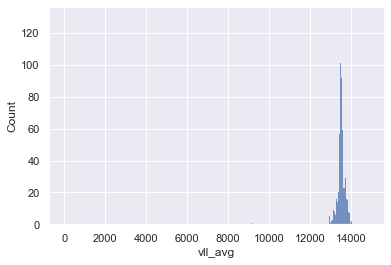

In [73]:
#Grafico Histograma
sns.histplot(data=frj1n,x='vll_avg', binwidth=0.7)

<AxesSubplot:xlabel='vll_avg', ylabel='Count'>

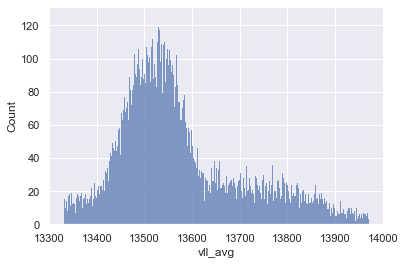

In [74]:
sns.histplot(data=frj1n_99,x='vll_avg', binwidth=0.7)

# Min Max Scaler

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
mm_scaler = MinMaxScaler()

In [77]:
col_name = 'vll_avg'
trans_col_name = 'vll_avg_mm'
frj1n[trans_col_name] = mm_scaler.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name] = mm_scaler.fit_transform(frj1n_99[[col_name]])

<AxesSubplot:xlabel='vll_avg_mm', ylabel='Count'>

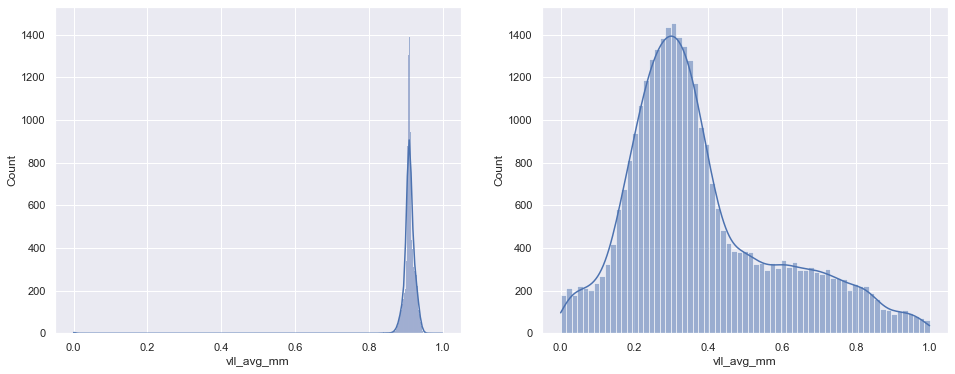

In [78]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')

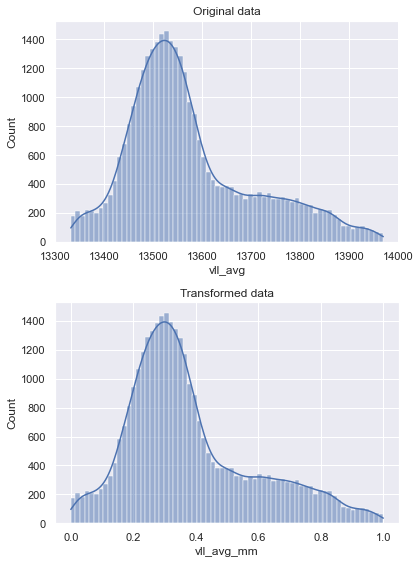

In [79]:
fig, axes = plt.subplots(nrows=2, figsize=(6,8))
sns.histplot(data=frj1n_99, x=col_name, ax=axes[0],kde=True)
axes[0].set_title('Original data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
axes[1].set_title('Transformed data')
plt.tight_layout()

# Standar Scaler o Normalizacion

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
sd_scaler = StandardScaler( )
sd_scaler2 = StandardScaler(with_mean=False, with_std=True)

In [82]:
col_name = 'vll_avg'
trans_col_name = 'vll_avg_sd'
frj1n[trans_col_name]= sd_scaler.fit_transform(frj1n[['vll_avg']])
frj1n_99[trans_col_name]= sd_scaler.fit_transform(frj1n_99[['vll_avg']])
frj1n_99[f'{trans_col_name}_2']= sd_scaler2.fit_transform(frj1n_99[['vll_avg']])

<AxesSubplot:xlabel='vll_avg_sd_2', ylabel='Count'>

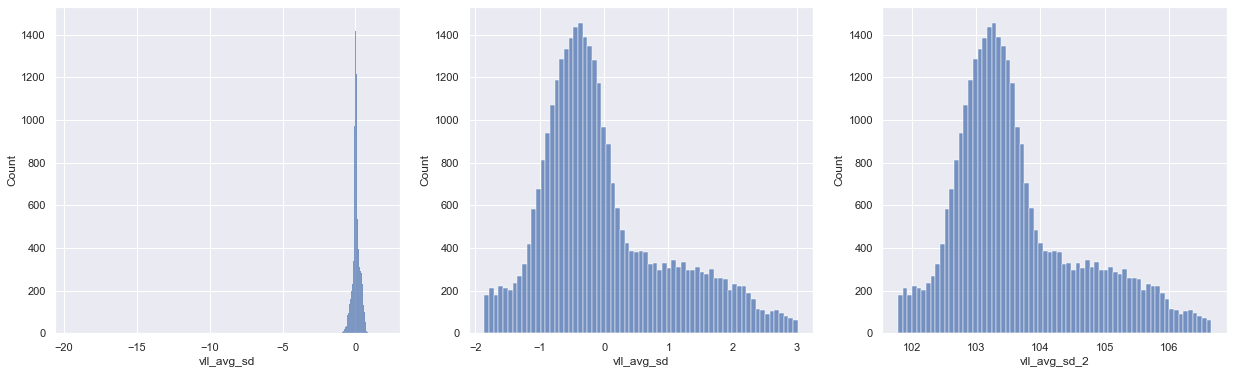

In [83]:
fig, axes = plt.subplots(ncols=3, figsize=(21,6))
sns.histplot(data=frj1n, x=trans_col_name, ax=axes[0])
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1])
sns.histplot(data=frj1n_99, x=f'{trans_col_name}_2', ax=axes[2])
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')

# Robust Scaler

In [84]:
from sklearn.preprocessing import RobustScaler

In [85]:
rb_scaler = RobustScaler ( )

In [86]:
#limpieza de outliers en mediciones de corriente, los cuales se generan por cortes de energia electrica

frj1n['i_avg'].quantile([0.1,0.5,0.9,0.95,0.99])

0.10    24.680128
0.50    26.541125
0.90    32.067558
0.95    32.531116
0.99    33.197200
Name: i_avg, dtype: float64

In [87]:
frj1n_10 = frj1n[frj1n['i_avg']>frj1n['i_avg'].quantile(0.1)].copy()


In [88]:
frj1n_99 = frj1n_10[frj1n_10['i_avg']<frj1n_10['i_avg'].quantile(0.99)].copy()

In [89]:
col_name = 'i_avg'
trans_col_name = 'i_avg_rb'
frj1n[trans_col_name]= rb_scaler.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name]= rb_scaler.fit_transform(frj1n_99[[col_name]])

<AxesSubplot:xlabel='i_avg_rb', ylabel='Count'>

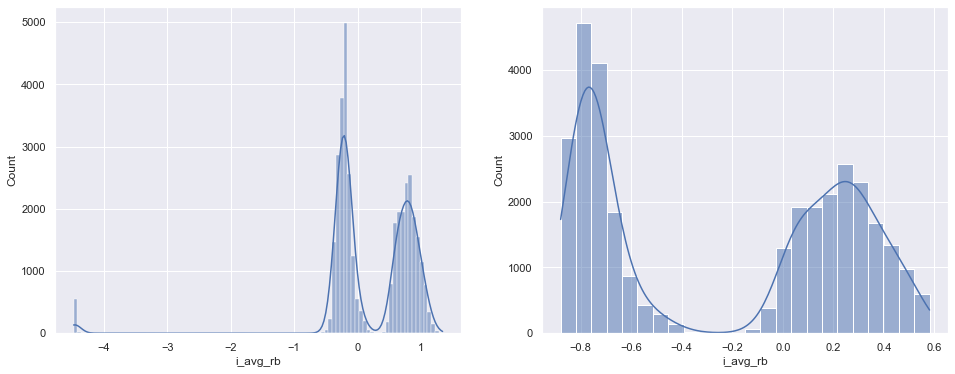

In [90]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=frj1n, x=trans_col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data')
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')

# Transformacion Box Cox

In [91]:
#limpieza de outliers en mediciones de potencia
frj1n['kw_tot'].quantile([0.1,0.5,0.9,0.95,0.99])

0.10    575.986542
0.50    615.820649
0.90    728.952185
0.95    734.297705
0.99    743.275268
Name: kw_tot, dtype: float64

In [92]:
frj1n_10 = frj1n[frj1n['kw_tot']>frj1n['kw_tot'].quantile(0.1)].copy()


In [93]:
frj1n_99 = frj1n_10[frj1n_10['kw_tot']<frj1n_10['kw_tot'].quantile(0.99)].copy()

In [94]:
from sklearn.preprocessing import PowerTransformer

In [95]:
bx_transformer = PowerTransformer(method='box-cox')

In [96]:
col_name = 'kw_tot'
trans_col_name = 'kw_tot_bx'
#frj1n[trans_col_name]= bx_transformer.fit_transform(frj1n[[col_name]])
frj1n_99[trans_col_name]= bx_transformer.fit_transform(frj1n_99[[col_name]])

<AxesSubplot:xlabel='kw_tot_bx', ylabel='Count'>

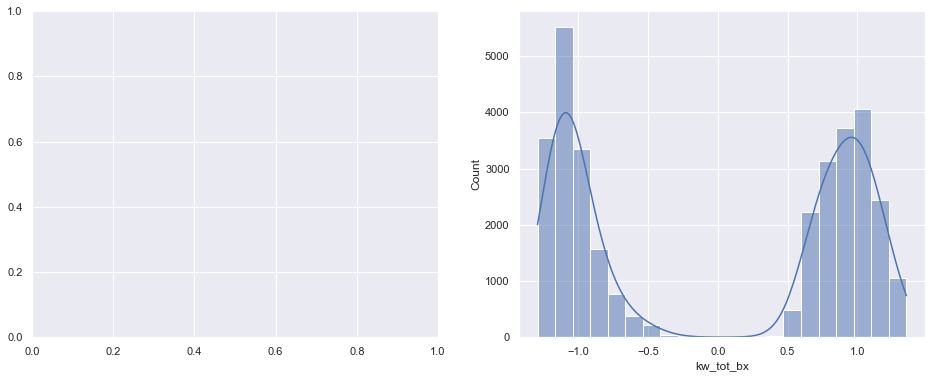

In [99]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
#sns.histplot(data=frj1n, x=col_name, ax=axes[0], kde=True)
# axes[0].set_title('Histogram with whole training data') - no se utiliza el set de datos original porque la variable
# tiene valores negativos
sns.histplot(data=frj1n_99, x=trans_col_name, ax=axes[1],kde=True)
# axes[1].set_title('Histogram of training data with no outliers (10 & 99 percentile)')

In [100]:
frj1n_99

,date,vll_ab,vll_bc,vll_ca,vll_avg,v_unbal,i_a,i_b,i_c,i_avg,...,Switch,vclasif_ab,vclasif_bc,vclasif_ca,kvar_warn,freq_error,vll_avg_mm,vll_avg_sd,i_avg_rb,kw_tot_bx
0,2023-05-02 20:45:00,13564.601,13676.08800,13625.21582,13621.96800,0.681128,28.492443,25.620981,25.445852,26.460642,...,0,Voltaje Normal,Voltaje Normal,Voltaje Normal,Ok,QoE_Out,0.916122,0.165430,-0.013563,-0.705521
1,2023-05-02 20:30:00,13503.564,13602.38000,13570.26700,13555.15625,0.626721,29.036205,25.575148,25.502625,26.653734,...,0,Voltaje Normal,Voltaje Normal,Voltaje Normal,Ok,QoE_Ok,0.911629,0.068905,0.018977,-0.653426
2,2023-05-02 20:15:00,13567.913,13658.65332,13634.95500,13620.50800,0.607101,28.467047,25.240606,25.277708,26.248981,...,0,Voltaje Normal,Voltaje Normal,Voltaje Normal,Ok,QoE_Ok,0.916024,0.163321,-0.049233,-0.771290
3,2023-05-02 20:00:00,13533.777,13599.11600,13590.74600,13571.46100,0.536207,28.508415,25.224625,25.349134,26.335846,...,0,Voltaje Normal,Voltaje Normal,Voltaje Normal,Ok,QoE_Ok,0.912725,0.092461,-0.034594,-0.767227
4,2023-05-02 19:45:00,13490.521,13590.71300,13566.94200,13549.31300,0.650523,28.793371,26.007170,25.830090,26.876274,...,0,Voltaje Normal,Voltaje Normal,Voltaje Normal,Ok,QoE_Out,0.911236,0.060463,0.056480,-0.571660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36553,2022-04-17 02:00:00,13794.535,13866.51300,13842.20000,13834.40800,0.243253,32.482582,29.274456,28.863388,30.206839,...,0,Voltaje Normal,Voltaje Normal,Voltaje Normal,Ok,QoE_Ok,0.930409,0.472348,0.617752,0.772632
36554,2022-04-17 01:45:00,13868.192,13957.82900,13915.89800,13913.97100,0.265036,32.559765,29.345390,28.857056,30.254066,...,0,Voltaje Normal,Voltaje Normal,Voltaje Normal,Ok,QoE_Ok,0.935760,0.587295,0.625711,0.844378
36555,2022-04-17 01:30:00,13858.353,13957.39700,13916.41400,13910.70900,0.328898,32.471920,29.166483,28.850023,30.162807,...,0,Voltaje Normal,Voltaje Normal,Voltaje Normal,Ok,QoE_Ok,0.935541,0.582582,0.610331,0.812039
36556,2022-04-17 01:15:00,13815.879,13915.19500,13881.89600,13870.99400,0.348926,32.330872,29.136560,28.907778,30.125074,...,0,Voltaje Normal,Voltaje Normal,Voltaje Normal,Ok,QoE_Ok,0.932870,0.525205,0.603973,0.766981


In [101]:
frj1n_99.shape

(32572, 24)

# Transformacion Variables Categoricas

In [102]:
!pip install category_encoders

In [109]:
col_ab = 'vclasif_ab'
col_bc = 'vclasif_bc'
col_ca = 'vclasif_ca'

One Hot Enconder

In [104]:
from category_encoders import OneHotEncoder

C:\WinPython\WPy64-39100\python-3.9.10.amd64\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [150]:
onehot_enc_ab = OneHotEncoder(use_cat_names=True, handle_unknown='ignore'   )

In [160]:
#onehot_enc_ab.fit_transform(frj1n[[col_ab]])
encoder_ab = pd.DataFrame(onehot_enc_ab.fit_transform(frj1n_99[[col_ab]])) #.toarray())

In [161]:
onehot_enc_ab.mapping[0]['mapping'] #   mapping[0]['mapping']

,vclasif_ab_Voltaje Normal,vclasif_ab_Bajo Voltaje
1,1,0
2,0,1
-2,0,0


In [162]:
frj1n_99 = frj1n_99.join(encoder_ab)

In [163]:
onehot_enc_bc = OneHotEncoder(use_cat_names=True, handle_unknown='ignore'  )

In [164]:
encoder_bc = pd.DataFrame(onehot_enc_bc.fit_transform(frj1n_99[[col_bc]])) #.toarray())
#onehot_enc_bc.fit_transform(frj1n[[col_bc]])

In [165]:
onehot_enc_bc.mapping[0]['mapping'] #   mapping[0]['mapping']

,vclasif_bc_Voltaje Normal,vclasif_bc_Bajo Voltaje
1,1,0
2,0,1
-2,0,0


In [166]:
frj1n_99 = frj1n_99.join(encoder_bc)

In [167]:
onehot_enc_ca = OneHotEncoder(use_cat_names=True, handle_unknown='ignore'  )

In [168]:
#onehot_enc_ca.fit_transform(frj1n[[col_ca]])
encoder_ca = pd.DataFrame(onehot_enc_ca.fit_transform(frj1n_99[[col_ca]])) #.toarray())

In [169]:
onehot_enc_ca.mapping[0]['mapping'] #   mapping[0]['mapping']

,vclasif_ca_Voltaje Normal,vclasif_ca_Alto Voltaje,vclasif_ca_Bajo Voltaje
1,1,0,0
2,0,1,0
3,0,0,1
-2,0,0,0


In [170]:
frj1n_99 = frj1n_99.join(encoder_ca)

In [171]:
frj1n_99.shape

(32572, 31)

In [172]:
frj1n_99.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32572 entries, 0 to 36557
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       32572 non-null  datetime64[ns]
 1   vll_ab                     32572 non-null  float64       
 2   vll_bc                     32572 non-null  float64       
 3   vll_ca                     32572 non-null  float64       
 4   vll_avg                    32572 non-null  float64       
 5   v_unbal                    32572 non-null  float64       
 6   i_a                        32572 non-null  float64       
 7   i_b                        32572 non-null  float64       
 8   i_c                        32572 non-null  float64       
 9   i_avg                      32572 non-null  float64       
 10  kw_tot                     32572 non-null  float64       
 11  kvar_tot                   32572 non-null  float64       
 12  kva_

# Binary Encoder

Para variables que son categoricas y binarias

In [173]:
from category_encoders import BinaryEncoder

In [174]:
bin_encoder = BinaryEncoder()

In [180]:
col_k = "kvar_warn"
col_f = "freq_error"

In [184]:
kvarwarning = bin_encoder.fit_transform(frj1n_99[col_k])
kvarwarning

,kvar_warn_0,kvar_warn_1
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
36553,0,1
36554,0,1
36555,0,1
36556,0,1


In [182]:
frj1n_99 = frj1n_99.join(kvarwarning)

In [185]:
frequency = bin_encoder.fit_transform(frj1n_99[col_f])
frequency

,freq_error_0,freq_error_1
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
36553,1,0
36554,1,0
36555,1,0
36556,1,0


In [183]:
frj1n_99 = frj1n_99.join(frequency)

In [186]:
frj1n_99.shape

(32572, 35)